Stephanie Smith
Matplotlib HW
Due 1/18/2020

## Observations and Insights

## Dependencies and starter code

In [63]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
# Merge our two data frames together
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [64]:
#Rename Tumor Volume (mm3) column for easier reference
combined_df = combined_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume"})

#Create list of functions to calculate tumor volume summary data
mystats = ['mean','median','var','std','sem']

#Create summary df showing mean, median, variance, standard dev, and SEM of Tumor Volume for each drug. Set Drug Regimen as index
summary_stats=combined_df.copy()
summary_stats=summary_stats.groupby(['Drug Regimen'],as_index=True)[['Tumor Volume']].agg(mystats)
summary_stats

Tumor Volume                                          
                     mean     median        var       std       sem
Drug Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

In [65]:
data_counts=combined_df["Drug Regimen"].value_counts()
data_counts=pd.DataFrame(data_counts)
data_counts = data_counts.rename(columns={"Drug Regimen":"Data Points"})
data_counts


,Data Points
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,161


## Bar plots

<IPython.core.display.Javascript object>


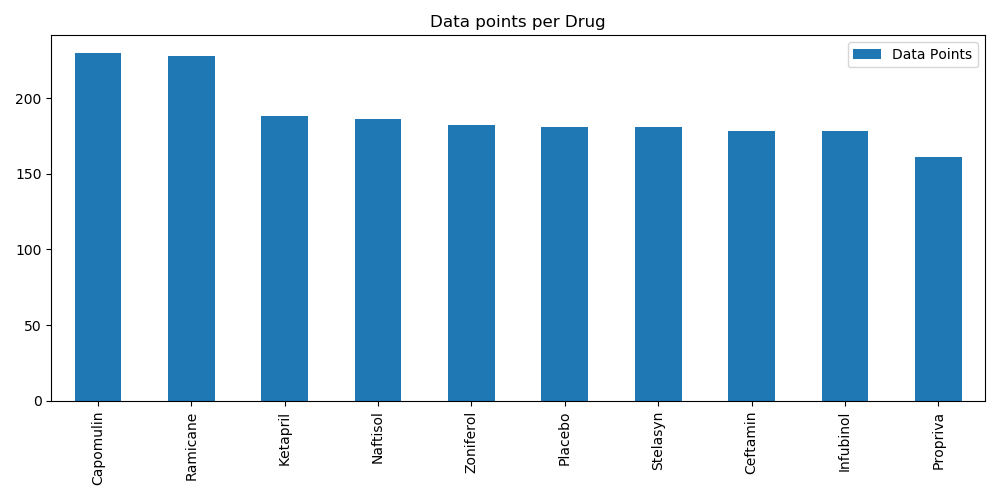

In [66]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#1- Get count of data points for each drug type

#2 - create df
# Use DataFrame.plot() in order to create a bar chart of the data
data_counts.plot(kind="bar", figsize=(10,5))

# Set a title for the chart
plt.title("Data points per Drug")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


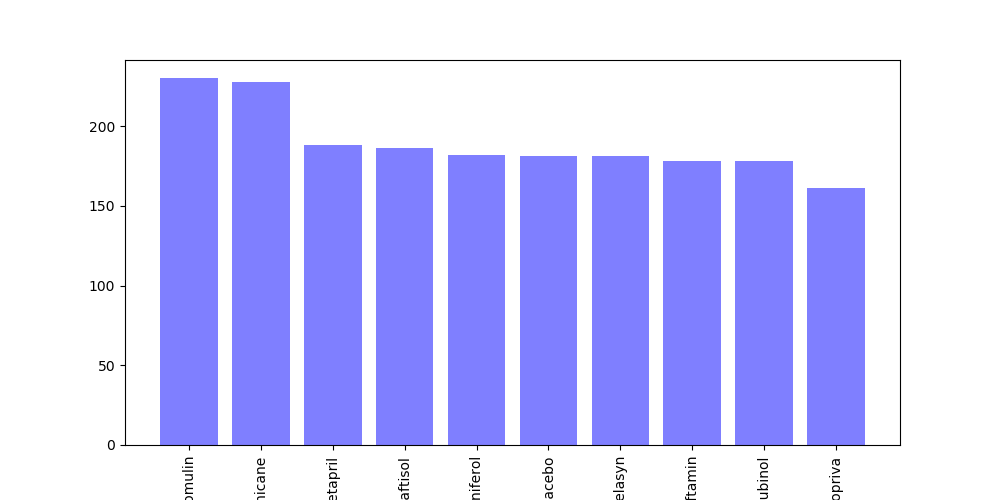

([<matplotlib.axis.XTick at 0x238a4cb8708>,
 <a list of 10 Text xticklabel objects>)

In [67]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_pts = data_counts["Data Points"]
drug_type = list(data_counts.index.values)
drug_type
# Set x axis and tick locations
x_axis = np.arange(0,len(drug_type))
x_axis
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis, data_pts, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_type, rotation="vertical")

## Pie plots

In [147]:
#create parameters for pie charts
pie_df=mouse_metadata
gender_counts=pie_df["Sex"].value_counts()
gender_df = gender_counts.to_frame().reset_index()
gender_df = gender_df.rename(columns={"index":"Gender","Sex":"Gender Count"})
type(gender_df)
gender_df

,Gender,Gender Count
0,Male,125
1,Female,124


<IPython.core.display.Javascript object>


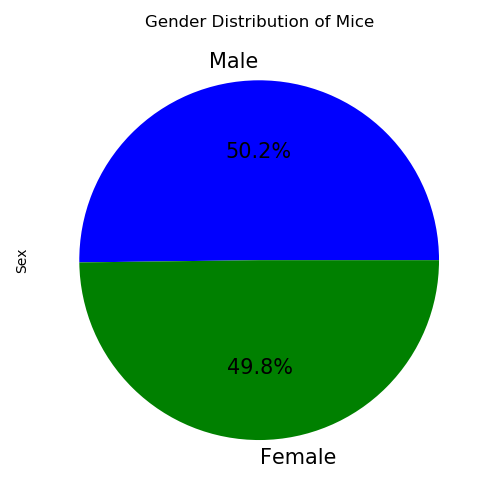

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Use DataFrame.plot() in order to create a pie chart of the data
gender = gender_df['Gender'].unique()
gender=gender.tolist()
gender
#gender_df.plot.pie(labels=gender, subplots=True, colors=['b', 'g'], figsize=(5,5))

gender_counts.plot.pie(labels=gender, colors=['b', 'g'], subplots=True, autopct='%1.1f%%', fontsize=15, figsize=(5, 5))
# Set a title for the chart
plt.title("Gender Distribution of Mice")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


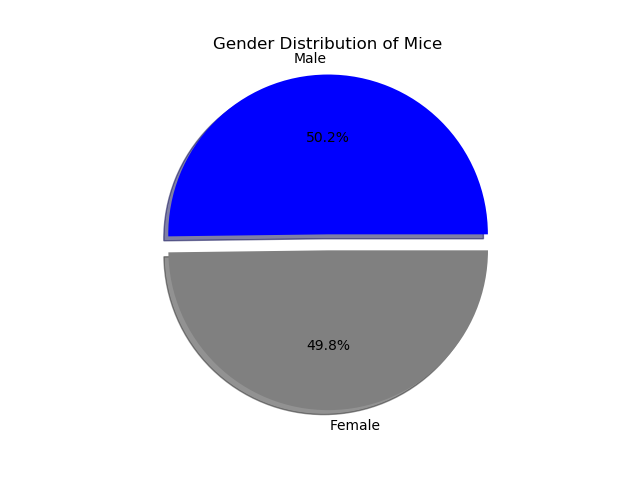

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The values of each section of the pie chart
gender_count = gender_counts

# Labels for the sections of our pie chart
sex = gender

# The colors of each section of the pie chart
colors = ["blue", "gray"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

plt.title("Gender Distribution of Mice")
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/GenderPiesMat.png")
plt.show()

## Quartiles, outliers and boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#get latest and greatest timepoint for each mouse
latest_timepoint = combined_df['Timepoint'].max()
latest_timepoint



45

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen